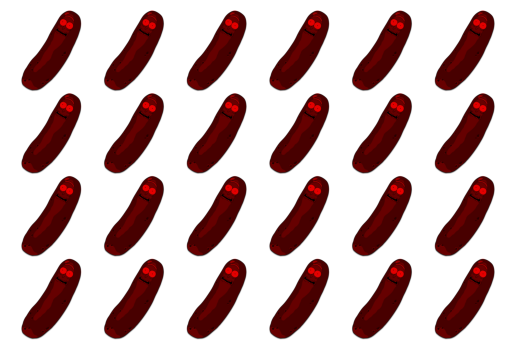

In [6]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def createTiledImage(loc_input, loc_output, replication_factor):
    image = Image.open(loc_input)
    np_image = np.array(image)

    # Get the size of the original image
    img_height, img_width = np_image.shape[:2]

    # Initialize a new array to hold the tiled image
    tiled_height = img_height * replication_factor[0]
    tiled_width = img_width * replication_factor[1]
    tiled_image = np.zeros((tiled_height, tiled_width, np_image.shape[2]), dtype=np_image.dtype)

    # Manually repeat the image by copying it into the correct positions
    for i in range(replication_factor[0]): # Vertical replication
        for j in range(replication_factor[1]): # Horizontal replication
            vertical_start = i * img_height
            vertical_end = (i + 1) * img_height
            horizontal_start = j * img_width
            horizontal_end = (j + 1) * img_width
            
            # Load the original image
            original_image = Image.open(loc_input)
            original_image = original_image.convert("RGBA")
            
            # Change the color and intensity of the original image
            altered_image = alterMirror(original_image, img_width, img_height)
            
            # Copy the altered image into the tiled image
            tiled_image[vertical_start:vertical_end, horizontal_start:horizontal_end] = np.array(altered_image)

    # Display the tiled image
    plt.imshow(tiled_image)
    plt.axis('off') # Hide the axis
    plt.show()

    # Save the tiled image
    output_image = Image.fromarray(tiled_image)
    output_image.save(os.path.join(loc_output, 'tiled_pickle_rick_rgb_extra.png'))

def alterMirror(image, width, height):
    img = image.convert("RGBA")

    for x in range(0, width):
        for y in range(0, height):
            pixel = img.getpixel((x, y))
            r, g, b, a = pixel
            img.putpixel((x, y), (r, 0, 0, a)) # setting green and blue values to zero
    return img

# specify the image location
loc_input = os.path.join("data", "input", "pickle_rick.png")
loc_output = os.path.join("data", "output")

# create the tiled image
createTiledImage(loc_input, loc_output, (4, 6))

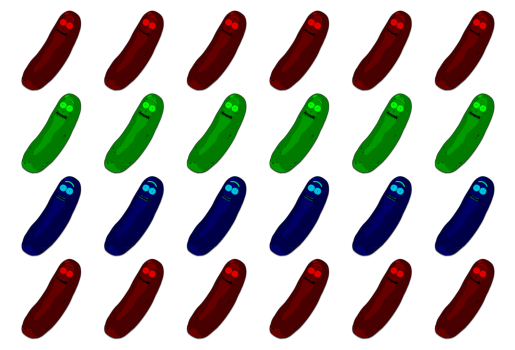

In [2]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def createTiledImage(loc_input, loc_output, replication_factor):
    image = Image.open(loc_input)
    np_image = np.array(image)

    # Get the size of the original image
    img_height, img_width = np_image.shape[:2]

    # Initialize a new array to hold the tiled image
    tiled_height = img_height * replication_factor[0]
    tiled_width = img_width * replication_factor[1]
    tiled_image = np.zeros((tiled_height, tiled_width, np_image.shape[2]), dtype=np_image.dtype)

    # Manually repeat the image by copying it into the correct positions
    for i in range(replication_factor[0]): # Vertical replication
        color = i % 3 # This will cycle through blue, green, and red for each vertical replication

        for j in range(replication_factor[1]): # Horizontal replication
            vertical_start = i * img_height
            vertical_end = (i + 1) * img_height
            horizontal_start = j * img_width
            horizontal_end = (j + 1) * img_width
            
            # Load the original image
            original_image = Image.open(loc_input)
            original_image = original_image.convert("RGBA")
            
            # Change the color and intensity of the original image
            altered_image = alterMirror(original_image, img_width, img_height, color)
            
            # Copy the altered image into the tiled image
            tiled_image[vertical_start:vertical_end, horizontal_start:horizontal_end] = np.array(altered_image)

    # Display the tiled image
    plt.imshow(tiled_image)
    plt.axis('off') # Hide the axis
    plt.show()

    # Save the tiled image
    output_image = Image.fromarray(tiled_image)
    output_image.save(os.path.join(loc_output, 'tiled_pickle_rick_rgb_alternate.png'))

def alterMirror(image, width, height, color):
    img = image.convert("RGBA")

    for x in range(0, width):
        for y in range(0, height):
            pixel = img.getpixel((x, y))
            r, g, b, a = pixel
            
            if color == 0: # Blue
                img.putpixel((x, y), (r, 0, 0, a))
            elif color == 1: # Green
                img.putpixel((x, y), (0, g, 0, a))
            else: # Red
                img.putpixel((x, y), (0, b, r, a))

    return img

# specify the image location
loc_input = os.path.join("data", "input", "pickle_rick.png")
loc_output = os.path.join("data", "output")

# create the tiled image
createTiledImage(loc_input, loc_output, (4, 6))